In [1]:
import os

os.chdir('/mnt/jw01-aruk-home01/projects/ra_challenge/RA_challenge/michael_dev/RA2_alpine_lads/ra_joint_predictions')

In [2]:
from utils.config import Config

config = Config()

In [3]:
from dream.prediction import predict_dream_test_set

predict_params = {
        'hands_joint_source': './data/predictions/hand_joint_data_test.csv',
        'feet_joint_source': './data/predictions/feet_joint_data_test.csv',
        'hands_narrowing_model': { 'model': '../trained_models/adam_no_weights_reg/narrowing_adam_no_weights_reg_shuffle.h5', 'is_regression': True },
        'wrists_narrowing_model': { 'model': '../trained_models/adam_no_weights_reg/wrists_narrowing_adam_no_weights_reg_shuffle.h5', 'is_regression': True },
        'feet_narrowing_model': { 'model': '../trained_models/adam_no_weights_reg/narrowing_adam_no_weights_reg_shuffle.h5', 'is_regression': True },
        'hands_erosion_model': { 'model': '../trained_models/adam_no_weights_reg/hands_erosion_adam_no_weights_reg_shuffle.h5', 'is_regression': True },
        'wrists_erosion_model': { 'model': '../trained_models/adam_no_weights_reg/wrists_erosion_adam_no_weights_reg_shuffle.h5', 'is_regression': True },
        'feet_erosion_model': { 'model': '../trained_models/adam_no_weights_reg/feet_erosion_adam_no_weights_reg_shuffle.h5', 'is_regression': True },
        'template_path': '../resources/template.csv',
        'output_path': '../trained_models/adam_no_weights_reg_combined_narrowing_shuffle_val_output.csv',
    }

predict_dream_test_set(config, predict_params)

In [4]:
import pandas as pd

v1 = pd.read_csv('../trained_models/output_v1_val.csv')
truth = pd.read_csv(config.train_location + '/training.csv')
adam_adapted_weights = pd.read_csv('../trained_models/adam_adapted_weights_val_output.csv')

adam_no_weigths_output = pd.read_csv('../trained_models/adam_no_weights_val_output.csv')
adam_no_weigths_narrowing_output = pd.read_csv('../trained_models/adam_no_weights_val_combined_narrowing_output.csv')
adam_no_weights_reg_output = pd.read_csv('../trained_models/adam_no_weights_reg_val_output.csv')
adam_no_weights_comb_reg_output = pd.read_csv('../trained_models/adam_no_weights_reg_combined_narrowing_val_output.csv')
adam_no_weights_comb_reg_no_pad = pd.read_csv('../trained_models/adam_no_weights_reg_no_pad_val_output.csv')
adam_no_weights_shuffle = pd.read_csv('../trained_models/adam_no_weights_reg_combined_narrowing_shuffle_val_output.csv')

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score

def print_report(truth, submitted_version, new_version):
    previos = submitted_version.merge(truth, how = 'inner', on  = 'Patient_ID')
    new = new_version.merge(truth, how = 'inner', on  = 'Patient_ID')

    print('Previous R2:', r2_score(previos['Overall_Tol_y'], previos['Overall_Tol_x']))
    print('New R2:', r2_score(new['Overall_Tol_y'], new['Overall_Tol_x']))
    
    print('Previous Narrowing R2:', r2_score(previos['Overall_narrowing_y'], previos['Overall_narrowing_x']))
    print('New Narrowing R2:', r2_score(new['Overall_narrowing_y'], new['Overall_narrowing_x']))
    
    print('Previous Erosion R2:', r2_score(previos['Overall_erosion_y'], previos['Overall_erosion_x']))
    print('New Erosion R2:', r2_score(new['Overall_erosion_y'], new['Overall_erosion_x']))
    
    print('Previous Overall MAE:', np.mean(np.absolute(previos['Overall_Tol_x'] - previos['Overall_Tol_y'])))
    print('New Overall MAE:', np.mean(np.absolute(new['Overall_Tol_x'] - new['Overall_Tol_y'])))
    
    truth_filter = ['_y' in column for column in previos.columns]
    pred_filter = ['_x' in column for column in previos.columns]
    
    narr_filter = ['J' in column for column in previos.columns]
    eros_filter = ['E' in column for column in previos.columns]
    
    hand_filter = ['H' in column for column in previos.columns]
    wrist_filter = ['wrist' in column for column in previos.columns]
    feet_filter = ['F' in column for column in previos.columns]
    
    hand_narrowing_filter = np.logical_and(narr_filter, hand_filter)
    wrists_narrowing_filter = np.logical_and(narr_filter, wrist_filter)
    feet_narrowing_filter = np.logical_and(narr_filter, feet_filter)
    
    hand_erosion_filter = np.logical_and(eros_filter, hand_filter)
    wrists_erosion_filter = np.logical_and(eros_filter, wrist_filter)
    feet_erosion_filter = np.logical_and(eros_filter, feet_filter)
    
    print('Previous Hand Narrowing R2', r2_score(np.sum(previos.iloc[:, np.logical_and(hand_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(hand_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Hand Narrowing R2', r2_score(np.sum(new.iloc[:, np.logical_and(hand_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(hand_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    
    print('Previous Wrist Narrowing R2', r2_score(np.sum(previos.iloc[:, np.logical_and(wrists_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(wrists_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Wrist Narrowing R2', r2_score(np.sum(new.iloc[:, np.logical_and(wrists_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(wrists_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    
    print('Previous Feet Narrowing R2', r2_score(np.sum(previos.iloc[:, np.logical_and(feet_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(feet_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Feet Narrowing R2', r2_score(np.sum(new.iloc[:, np.logical_and(feet_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(feet_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    
    
    
    print('Previous Hand Erosion R2', r2_score(np.sum(previos.iloc[:, np.logical_and(hand_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(hand_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Hand Erosion R2', r2_score(np.sum(new.iloc[:, np.logical_and(hand_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(hand_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    
    print('Previous Wrist Erosion R2', r2_score(np.sum(previos.iloc[:, np.logical_and(wrists_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(wrists_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Wrist Erosion R2', r2_score(np.sum(new.iloc[:, np.logical_and(wrists_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(wrists_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    
    print('Previous Feet Erosion R2', r2_score(np.sum(previos.iloc[:, np.logical_and(feet_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(feet_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Feet Erosion R2', r2_score(np.sum(new.iloc[:, np.logical_and(feet_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(feet_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    
    plt.figure(figsize = (8, 8))
    plt.scatter(previos['Overall_Tol_y'], previos['Overall_Tol_x'])
    plt.plot([0, 350], [0, 350])
    plt.title('Previous')
    
    plt.figure(figsize = (8, 8))
    plt.scatter(new['Overall_Tol_y'], new['Overall_Tol_x'])
    plt.plot([0, 350], [0, 350])
    plt.title('New')
    
    is_smaller_count = 0
    no_joints = truth.columns[4:].size

    increased = []
    decreased = []
    
    # no_joints = 0
    for column in truth.columns[4:]:
        
        
        #if 'J' in column and 'wrist' not in column:
            #no_joints += 1
        v1_mae = np.mean(np.absolute(previos[column + '_x'] - previos[column + '_y']))
        adam_adapted_weights_mae = np.mean(np.absolute(new[column + '_x'] - new[column + '_y']))

        is_smaller = adam_adapted_weights_mae < v1_mae

        if is_smaller:
            is_smaller_count+=1
            decreased.append(adam_adapted_weights_mae - v1_mae)
        else:
            increased.append(adam_adapted_weights_mae - v1_mae)

        print(column, '\t\t', v1_mae, '\t', adam_adapted_weights_mae, '\t\t', is_smaller)
    
    improved_ratio = is_smaller_count / no_joints
    
    print(f'Score improved on {is_smaller_count} out of {no_joints} joints ({improved_ratio})')
    print('Mean Score improvement:', np.mean(np.array(decreased)))
    print('Mean Score worsen:', np.mean(np.array(increased)))
    print('Std Score improvement:', np.std(np.array(decreased)))
    print('Std Score worsen:', np.std(np.array(increased)))
    
    plt.figure(figsize = (8, 8))
    plt.hist(decreased)
    plt.title('Decreased Scores')
    plt.figure(figsize = (8, 8))
    plt.hist(increased)
    plt.title('Increased Scores')

Previous R2: 0.7141595889726446
New R2: 0.7650227655992576
Previous Narrowing R2: 0.8632838358917424
New Narrowing R2: 0.8784761360736698
Previous Erosion R2: 0.47104570278039537
New Erosion R2: 0.5464716734715618
Previous Overall MAE: 10.139680860068083
New Overall MAE: 9.766242914185252
Previous Hand Narrowing R2 0.9061566325674564
New Hand Narrowing R2 0.9057336179193392
Previous Wrist Narrowing R2 0.9266446755545681
New Wrist Narrowing R2 0.9112268038684017
Previous Feet Narrowing R2 0.5976912110764925
New Feet Narrowing R2 0.6495187324727376
Previous Hand Erosion R2 0.5210499083689656
New Hand Erosion R2 0.5260516463172056
Previous Wrist Erosion R2 0.6542266861600035
New Wrist Erosion R2 0.4987444602072888
Previous Feet Erosion R2 0.24800168323233884
New Feet Erosion R2 0.4513710973348185
LH_mcp_E__ip 		 0.06696621296198471 	 0.07221701611643253 		 False
LH_pip_E__2 		 0.1114106508700744 	 0.12183516893697821 		 False
LH_pip_E__3 		 0.19090187841135522 	 0.20695277756970862 		 Fal

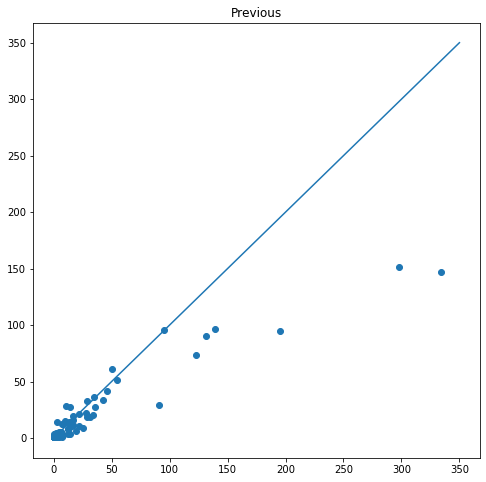

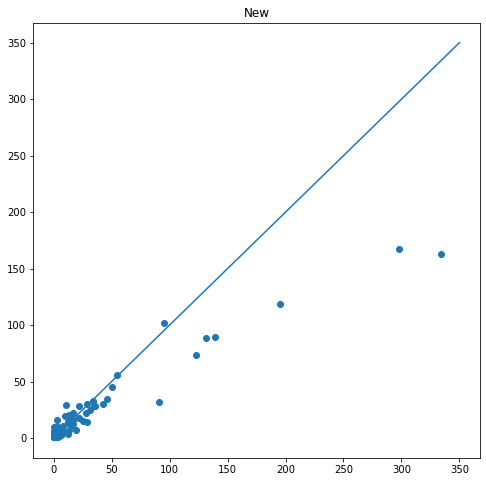

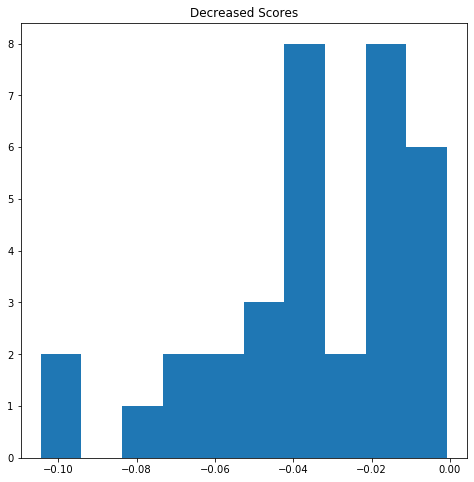

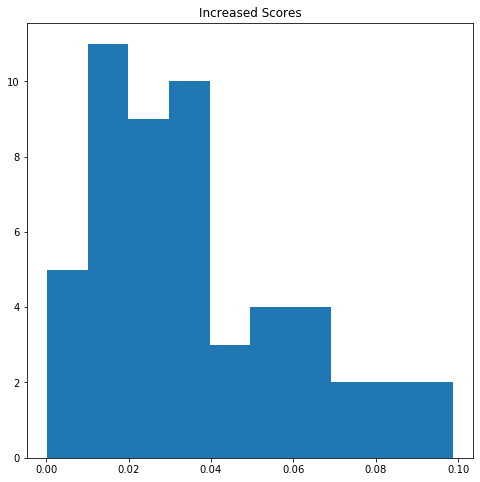

In [8]:
print_report(truth, adam_no_weights_reg_output, adam_no_weights_shuffle)

Previous R2: 0.6204825976590534
New R2: 0.6679925734664311
Previous Overall MAE: 11.660043634382404
New Overall MAE: 11.664145189515196
LH_mcp_E__ip 		 0.06524683304319272 	 0.06660434185663246 		 False
LH_pip_E__2 		 0.10867159503214639 	 0.12112343521496326 		 False
LH_pip_E__3 		 0.19446606163094465 	 0.2112411973782622 		 False
LH_pip_E__4 		 0.14910275586652225 	 0.1984640450528337 		 False
LH_pip_E__5 		 0.07515408313258125 	 0.12068605740522603 		 False
LH_mcp_E__1 		 0.2674289266222902 	 0.2681402067916699 		 False
LH_mcp_E__2 		 0.22328392384362092 	 0.25270826014673603 		 False
LH_mcp_E__3 		 0.21759447449798328 	 0.2755836495278813 		 False
LH_mcp_E__4 		 0.08157544828246902 	 0.11108630600842931 		 False
LH_mcp_E__5 		 0.22288872746519892 	 0.23365673292053532 		 False
LH_wrist_E__mc1 		 0.05441760784337222 	 0.06965614384880726 		 False
LH_wrist_E__mul 		 0.175562653324617 	 0.16280642754254987 		 True
LH_wrist_E__nav 		 0.3143387020382006 	 0.20782374998097708 		 True
LH_

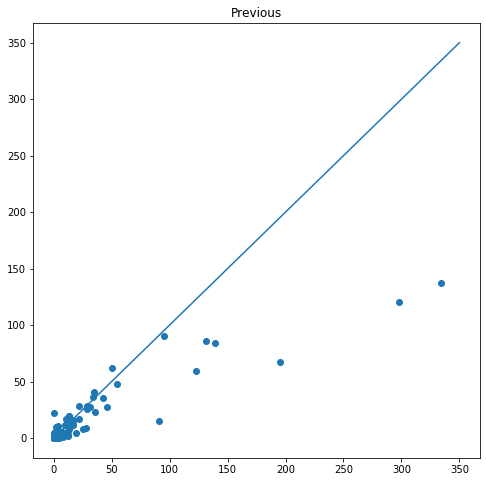

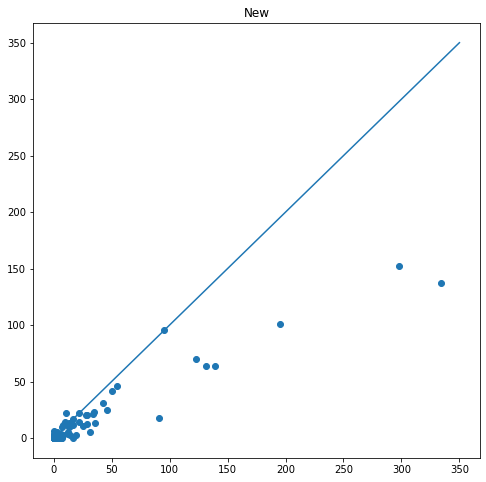

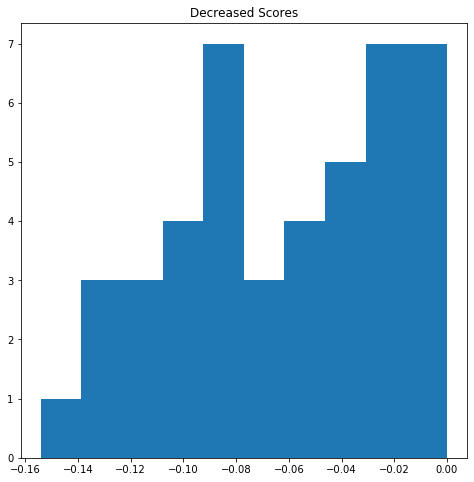

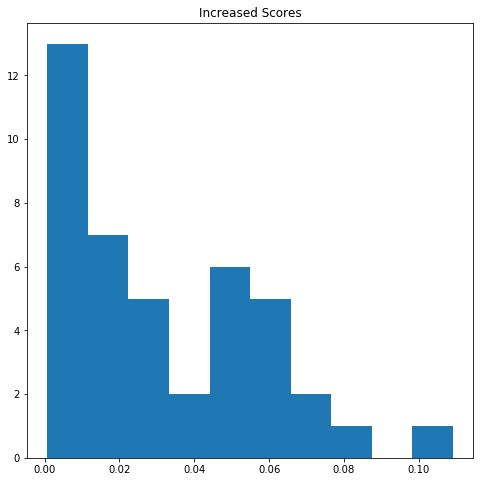

In [7]:
print_report(truth, v1, adam_no_weigths_narrowing_output)

Previous R2: 0.6204825976590534
New R2: 0.6375285449366929
Previous Overall MAE: 11.660043634382404
New Overall MAE: 12.048951485057616
LH_mcp_E__ip 		 0.06524683304319272 	 0.06565550786957677 		 False
LH_pip_E__2 		 0.10867159503214639 	 0.10881384363687575 		 False
LH_pip_E__3 		 0.19446606163094465 	 0.19135572542478158 		 True
LH_pip_E__4 		 0.14910275586652225 	 0.14654073437684595 		 True
LH_pip_E__5 		 0.07515408313258125 	 0.06670570833429215 		 True
LH_mcp_E__1 		 0.2674289266222902 	 0.24714329249335004 		 True
LH_mcp_E__2 		 0.22328392384362092 	 0.22263387562020776 		 True
LH_mcp_E__3 		 0.21759447449798328 	 0.22548184213705658 		 False
LH_mcp_E__4 		 0.08157544828246902 	 0.1174747443062407 		 False
LH_mcp_E__5 		 0.22288872746519892 	 0.209239279628028 		 True
LH_wrist_E__mc1 		 0.05441760784337222 	 0.06574403321920406 		 False
LH_wrist_E__mul 		 0.175562653324617 	 0.19380900621355557 		 False
LH_wrist_E__nav 		 0.3143387020382006 	 0.24524101958940508 		 True
LH_wris

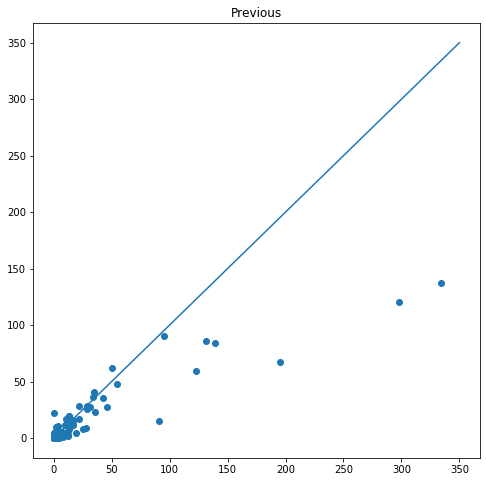

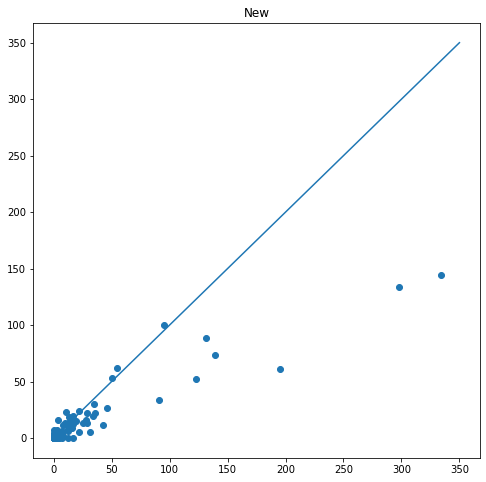

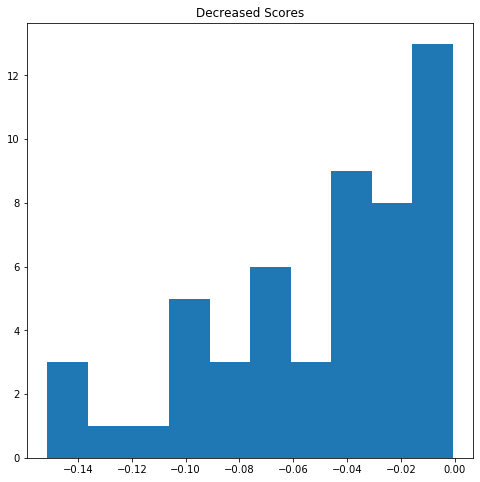

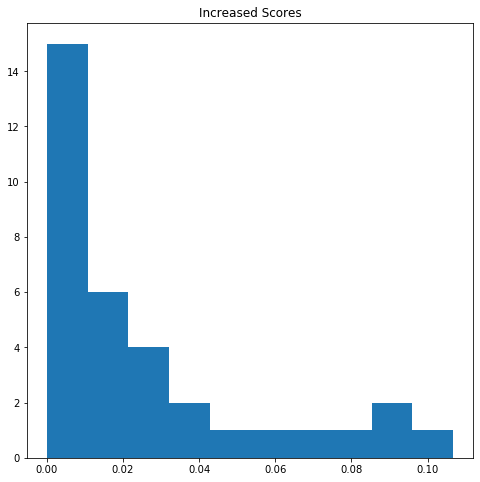

In [8]:
print_report(truth, v1, adam_adapted_weights)

In [19]:
v1 = output.merge(truth, how = 'inner', on  = 'Patient_ID')
adam_adapted_weights = new_output.merge(truth, how = 'inner', on  = 'Patient_ID')

In [33]:
train_data_mask = [patient_id not in v1['Patient_ID'] for patient_id in truth['Patient_ID']]

train_data = truth.iloc[train_data_mask]

In [35]:
mean_tol = np.mean(train_data['Overall_Tol'])

In [39]:
from sklearn.metrics import r2_score

r2_score(v1['Overall_Tol_y'], v1['Overall_Tol_x'])

0.6204825976590534

In [40]:
r2_score(adam_adapted_weights['Overall_Tol_y'], adam_adapted_weights['Overall_Tol_x'])

0.6375285449366929

In [41]:
import numpy as np

np.mean(np.absolute(adam_adapted_weights['Overall_Tol_x'] - adam_adapted_weights['Overall_Tol_y']))

12.048951485057616

In [42]:
np.mean(np.absolute(v1['Overall_Tol_x'] - v1['Overall_Tol_y']))

11.660043634382404

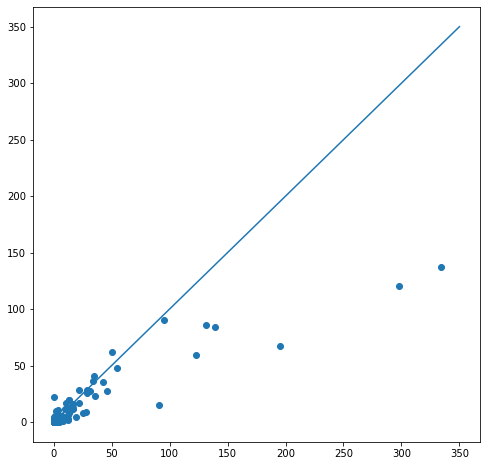

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
plt.scatter(v1['Overall_Tol_y'], v1['Overall_Tol_x'])
plt.plot([0, 350], [0, 350])

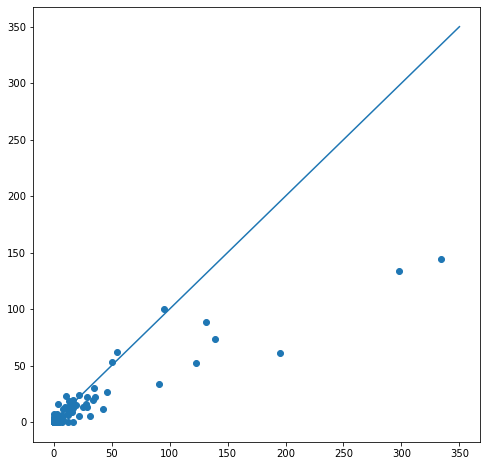

In [23]:
plt.figure(figsize = (8, 8))
plt.scatter(adam_adapted_weights['Overall_Tol_y'], adam_adapted_weights['Overall_Tol_x'])
plt.plot([0, 350], [0, 350])

In [32]:
is_smaller_count = 0
no_joints = truth.columns[4:].size

increased = []
decreased = []

for column in truth.columns[4:]:
    v1_mae = np.mean(np.absolute(v1[column + '_x'] - v1[column + '_y']))
    adam_adapted_weights_mae = np.mean(np.absolute(adam_adapted_weights[column + '_x'] - adam_adapted_weights[column + '_y']))
    
    is_smaller = adam_adapted_weights_mae < v1_mae
    
    if is_smaller:
        is_smaller_count+=1
        decreased.append(adam_adapted_weights_mae - v1_mae)
    else:
        increased.append(adam_adapted_weights_mae - v1_mae)
    
    print(column, '\t\t', v1_mae, '\t', adam_adapted_weights_mae, '\t\t', is_smaller)
    
improved_ratio = is_smaller_count / no_joints
    
print(f'Score improved on {is_smaller_count} out of {no_joints} joints ({improved_ratio})')
print('Mean Score improvement:', np.mean(np.array(decreased)))
print('Mean Score worsen:', np.mean(np.array(increased)))

LH_mcp_E__ip 		 0.06524683304319272 	 0.06565550786957677 		 False
LH_pip_E__2 		 0.10867159503214639 	 0.10881384363687575 		 False
LH_pip_E__3 		 0.19446606163094465 	 0.19135572542478158 		 True
LH_pip_E__4 		 0.14910275586652225 	 0.14654073437684595 		 True
LH_pip_E__5 		 0.07515408313258125 	 0.06670570833429215 		 True
LH_mcp_E__1 		 0.2674289266222902 	 0.24714329249335004 		 True
LH_mcp_E__2 		 0.22328392384362092 	 0.22263387562020776 		 True
LH_mcp_E__3 		 0.21759447449798328 	 0.22548184213705658 		 False
LH_mcp_E__4 		 0.08157544828246902 	 0.1174747443062407 		 False
LH_mcp_E__5 		 0.22288872746519892 	 0.209239279628028 		 True
LH_wrist_E__mc1 		 0.05441760784337222 	 0.06574403321920406 		 False
LH_wrist_E__mul 		 0.175562653324617 	 0.19380900621355557 		 False
LH_wrist_E__nav 		 0.3143387020382006 	 0.24524101958940508 		 True
LH_wrist_E__lunate 		 0.2677663260644272 	 0.20181529850215457 		 True
LH_wrist_E__radius 		 0.20881298570668574 	 0.17879359195011504 		 True
